<a href="https://colab.research.google.com/github/ARYANSRIVATSAVA/machine-learning-and-data-science/blob/main/music_production_artist_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [36]:
data = pd.read_csv('/content/artists.csv.zip')
data.head(3)

<ipython-input-36-45a5acccc80c>:1: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/artists.csv.zip')


,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False


<ipython-input-10-fd0725f1fab2>:6: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/artists.csv.zip')
<ipython-input-10-fd0725f1fab2>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


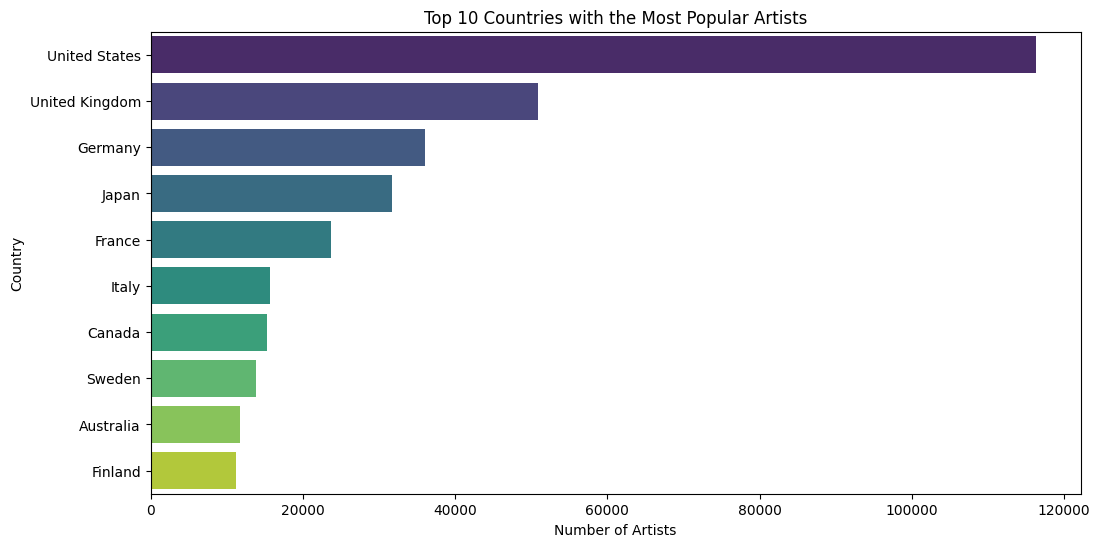

<ipython-input-10-fd0725f1fab2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


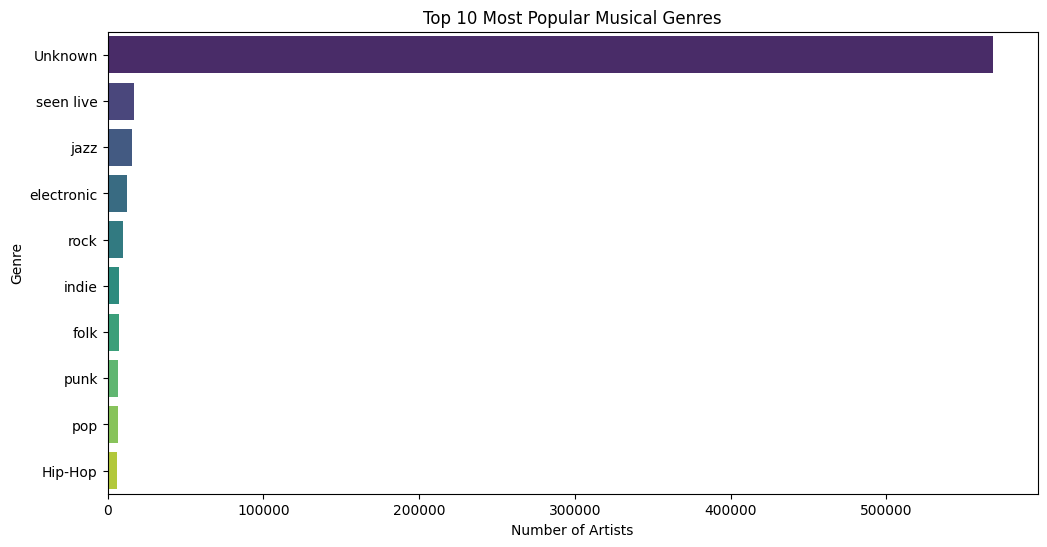

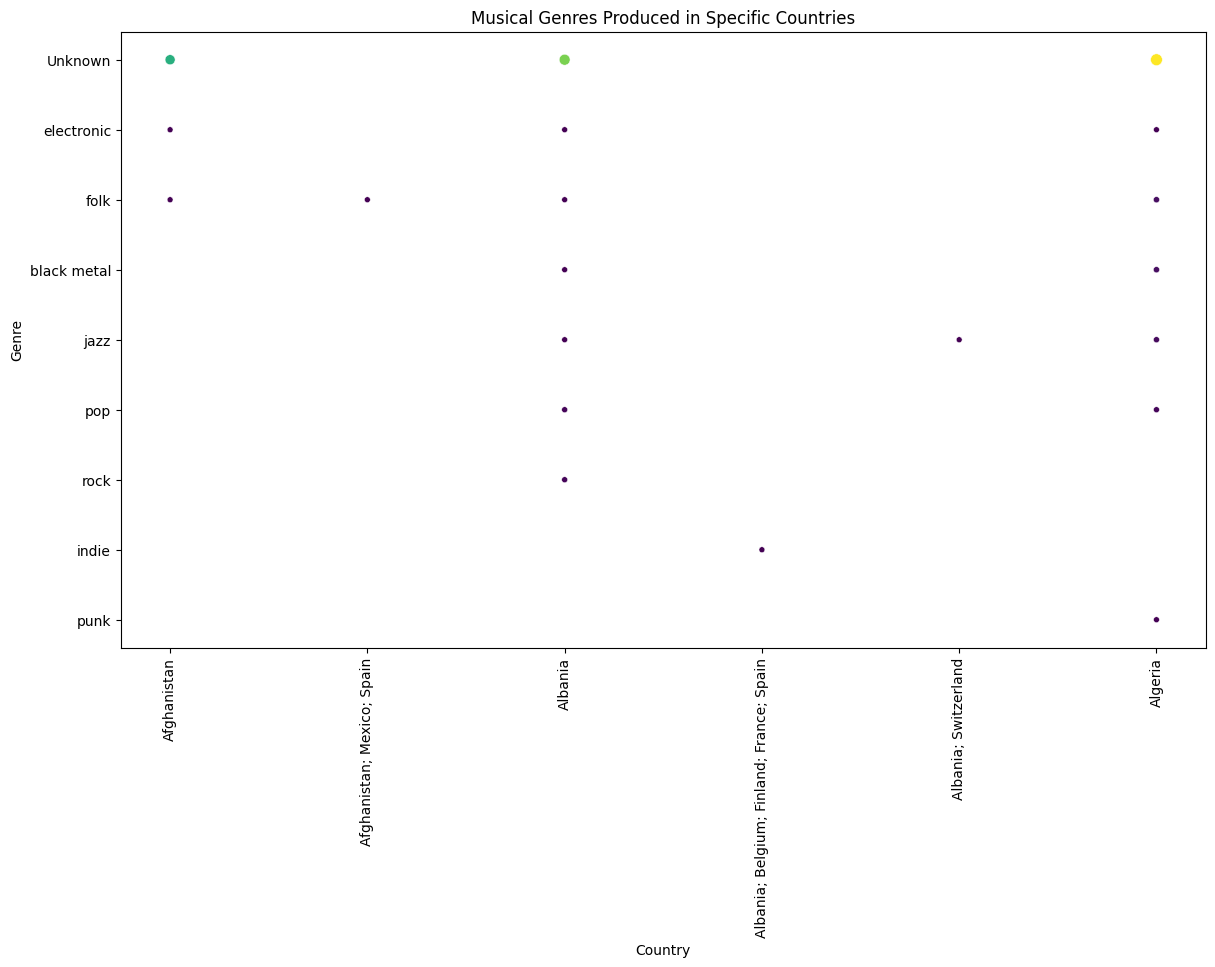

Top 10 Repeated Artist Names:
artist_lastfm
Karma      26
Trinity    24
Nemesis    23
Eden       23
Angel      23
Bliss      21
Eclipse    21
Odyssey    20
Indigo     20
Mirage     20
Name: count, dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/artists.csv.zip')

# Data Preparation
# Remove duplicates in artists
data = data.drop_duplicates(subset=['mbid'])

# Establish single country of origin
data['country'] = data['country_mb'].combine_first(data['country_lastfm'])

# Establish single genre from list of tags
data['genre'] = data['tags_lastfm'].combine_first(data['tags_mb']).apply(lambda x: x.split(';')[0] if pd.notnull(x) else 'Unknown')

# Investigate and quantify the problem of duplicated artist names
duplicate_artists = data[data.duplicated(subset=['artist_lastfm'], keep=False)]
top_10_repeated_artists = duplicate_artists['artist_lastfm'].value_counts().head(10)

# Collapsing ambiguous artists into one row per artist name
data = data[~data.duplicated(subset=['artist_lastfm'], keep='first')]

# Visualization
# 1. Where do the most popular artists come from?
country_counts = data['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Countries with the Most Popular Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Country')
plt.show()

# 2. Which musical genres are the most popular?
genre_counts = data['genre'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Popular Musical Genres')
plt.xlabel('Number of Artists')
plt.ylabel('Genre')
plt.show()

'''# 3. Are musical genres produced in specific countries?
genre_country = data.groupby(['country', 'genre']).size().reset_index(name='count')
top_genres = genre_country.groupby('genre')['count'].sum().nlargest(10).index
top_genre_country = genre_country[genre_country['genre'].isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_genre_country.head(20), x='country', y='genre', size='count', legend=False, hue='count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Musical Genres Produced in Specific Countries')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.show()'''

# Output the top 10 repeated artist names
print("Top 10 Repeated Artist Names:")
print(top_10_repeated_artists)


In [20]:
df.groupby(['country', 'genre']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

,country,genre,count
32294,United States,Unknown,52601
29791,United Kingdom,Unknown,22037
12296,Germany,Unknown,16030
18067,Japan,Unknown,15971
10377,France,Unknown,11271
16855,Italy,Unknown,7382
5019,Canada,Unknown,6578
949,Australia,Unknown,6013
2857,Belgium,Unknown,5627
26541,Spain,Unknown,5338


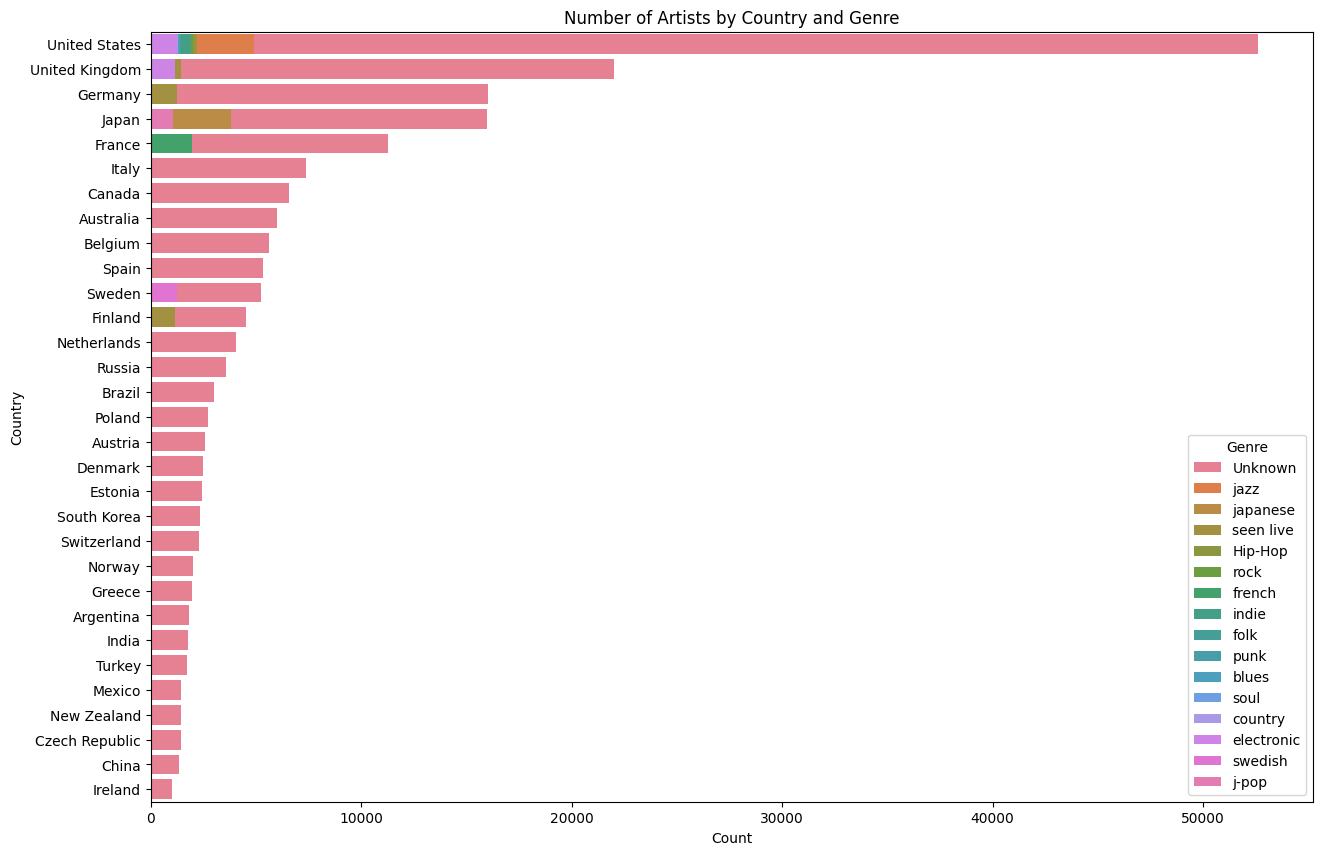

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data

# Group by country and genre and get the count
grouped_data = df.groupby(['country', 'genre']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(50)

# Plotting the data
plt.figure(figsize=(15, 10))
sns.barplot(data=grouped_data, x='count', y='country', hue='genre', dodge=False)
plt.title('Number of Artists by Country and Genre')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Genre')
plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv('/content/artists.csv.zip')

# Data Preparation
# Remove duplicates in artists
data = data.drop_duplicates(subset=['mbid'])

# Fill country columns
data['country_mb'] = data['country_mb'].fillna('')
data['country_lastfm'] = data['country_lastfm'].fillna('')

# Establish single country of origin
def unify_country(row):
    mb_countries = row['country_mb'].split('; ')
    lastfm_countries = row['country_lastfm'].split('; ')

    # If only one MusicBrainz country and it is in last.fm tags
    if len(mb_countries) == 1 and mb_countries[0] in lastfm_countries:
        return mb_countries[0]
    # If only one country in last.fm tags
    elif len(lastfm_countries) == 1:
        return lastfm_countries[0]
    # If only one country in MusicBrainz tags
    elif len(mb_countries) == 1:
        return mb_countries[0]
    # Most frequent country in last.fm tags
    else:
        return max(set(lastfm_countries), key=lastfm_countries.count)

data['country'] = data.apply(unify_country, axis=1)

# Unify genres
# Function to clean tags
def clean_tags(tags):
    if pd.isnull(tags):
        return []
    return [tag.strip().lower() for tag in tags.split('; ')]

data['tags_mb'] = data['tags_mb'].apply(clean_tags)
data['tags_lastfm'] = data['tags_lastfm'].apply(clean_tags)

# Define a function to determine the most popular tag that is a genre
def unify_genres(row):
    all_tags = row['tags_lastfm'] + row['tags_mb']
    all_tags_count = pd.Series(all_tags).value_counts()

    for tag, count in all_tags_count.items():
        if 'vocalist' not in tag and 'live' not in tag and 'listener' not in tag:
            return tag
    return 'unknown'

data['genre'] = data.apply(unify_genres, axis=1)


<ipython-input-22-d2a3f6db0dfc>:7: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/artists.csv.zip')


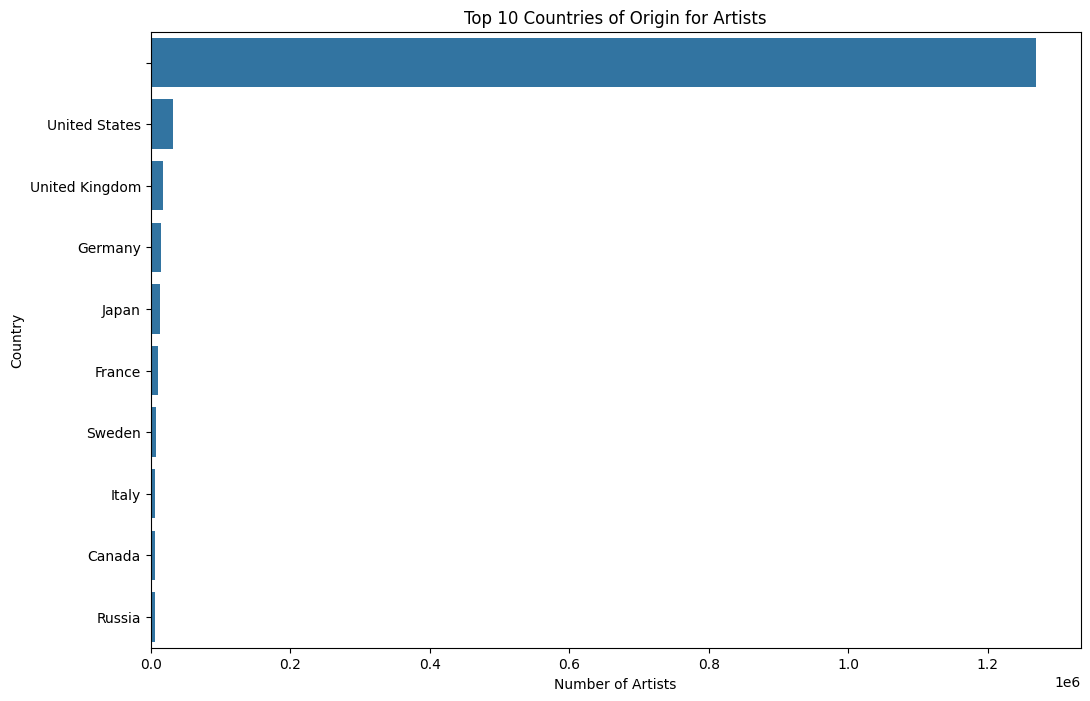

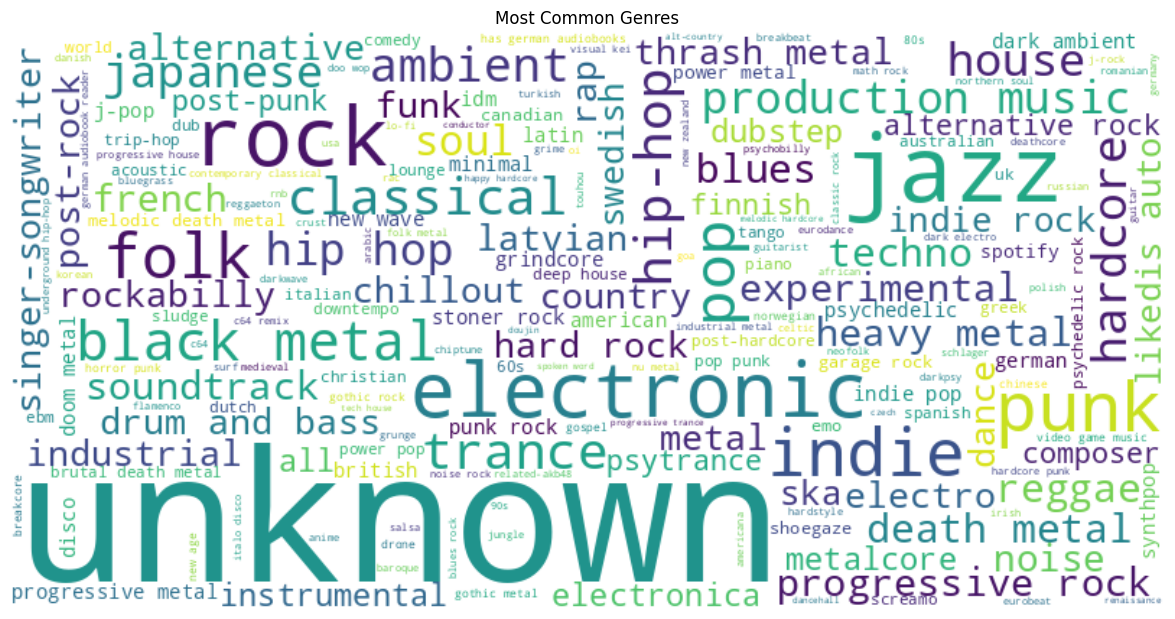

In [24]:
from wordcloud import WordCloud

# Visualization: Most common countries
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries of Origin for Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Country')
plt.show()

# Visualization: Most common genres (word cloud)
genre_counts = data['genre'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres')
plt.show()

In [25]:

# Filter out the top 100 artists by listeners
top_artists = df.nlargest(100, 'listeners_lastfm')



In [38]:
top_artists

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False
...,...,...,...,...,...,...,...,...,...,...
1466078,1eab523e-98ff-4083-aa34-8922740bc696,정은지,NaN,South Korea,South Korea,NaN,NaN,NaN,NaN,False
1466079,a18f0527-907e-42b0-8268-504966274581,남태현,NaN,South Korea,NaN,NaN,NaN,NaN,NaN,False
1466080,20a57e37-24b5-4301-855b-35076580fb88,헤일로,NaN,South Korea,NaN,NaN,NaN,NaN,NaN,False
1466081,83891a4d-1bf4-4abe-a483-5b3d9d614efa,서현진,NaN,South Korea,South Korea,NaN,NaN,NaN,NaN,False


In [28]:
import numpy as np

<ipython-input-39-7f23780026e8>:5: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/artists.csv.zip')  # Replace with your dataset path


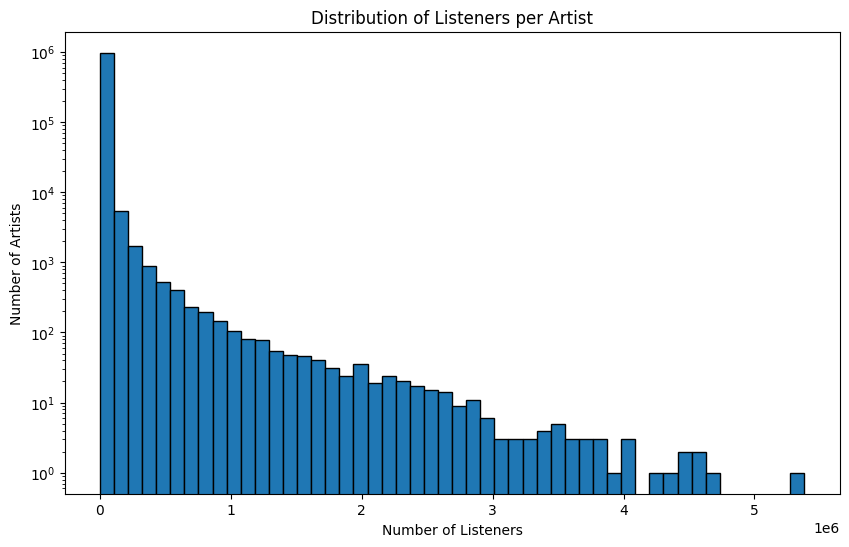

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df = pd.read_csv('/content/artists.csv.zip')  # Replace with your dataset path

# Drop rows where 'listeners_lastfm' is NaN
df_clean = df.dropna(subset=['listeners_lastfm'])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean['listeners_lastfm'], bins=50, edgecolor='k')
plt.title('Distribution of Listeners per Artist')
plt.xlabel('Number of Listeners')
plt.ylabel('Number of Artists')
plt.yscale('log')  # Use logarithmic scale for better visualization if the range is large
plt.show()


<ipython-input-44-3d27269e4d70>:6: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/artists.csv.zip')  # Replace with your dataset path
<ipython-input-44-3d27269e4d70>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listeners_bin'] = pd.cut(df_clean['listeners_lastfm'], bins=10)  # Adjust number of bins as needed


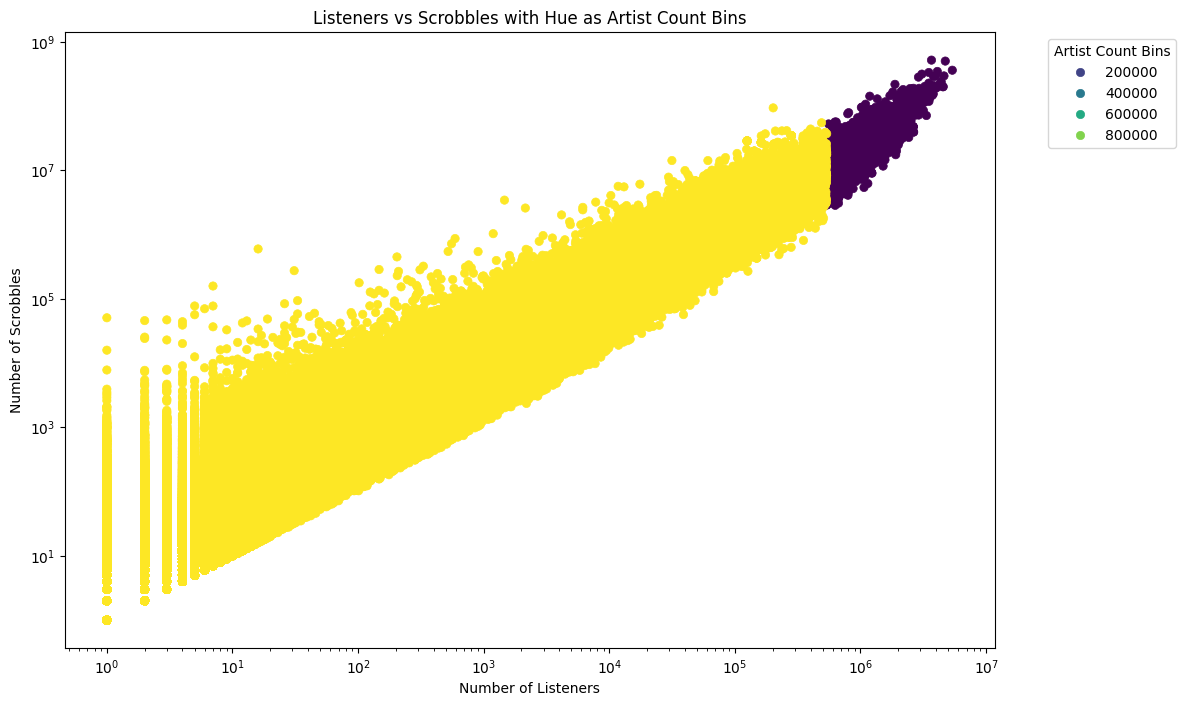

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
df = pd.read_csv('/content/artists.csv.zip')  # Replace with your dataset path

# Drop rows with NaN values in 'listeners_lastfm' or 'scrobbles_lastfm'
df_clean = df.dropna(subset=['listeners_lastfm', 'scrobbles_lastfm'])

# Define bins for listener counts
df_clean['listeners_bin'] = pd.cut(df_clean['listeners_lastfm'], bins=10)  # Adjust number of bins as needed

# Count the number of artists in each bin
bin_counts = df_clean['listeners_bin'].value_counts().reset_index()
bin_counts.columns = ['listeners_bin', 'artist_count']

# Merge the bin counts with the original DataFrame
df_clean = df_clean.merge(bin_counts, on='listeners_bin')

# Create scatter plot with hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean, x='listeners_lastfm', y='scrobbles_lastfm', hue='artist_count', palette='viridis', edgecolor=None)
plt.title('Listeners vs Scrobbles with Hue as Artist Count Bins')
plt.xlabel('Number of Listeners')
plt.ylabel('Number of Scrobbles')
plt.legend(title='Artist Count Bins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')  # Optional: Use logarithmic scale if needed
plt.xscale('log')  # Optional: Use logarithmic scale if needed
plt.show()


<ipython-input-45-3e142315d2ff>:5: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/artists.csv.zip')  # Replace with your dataset path


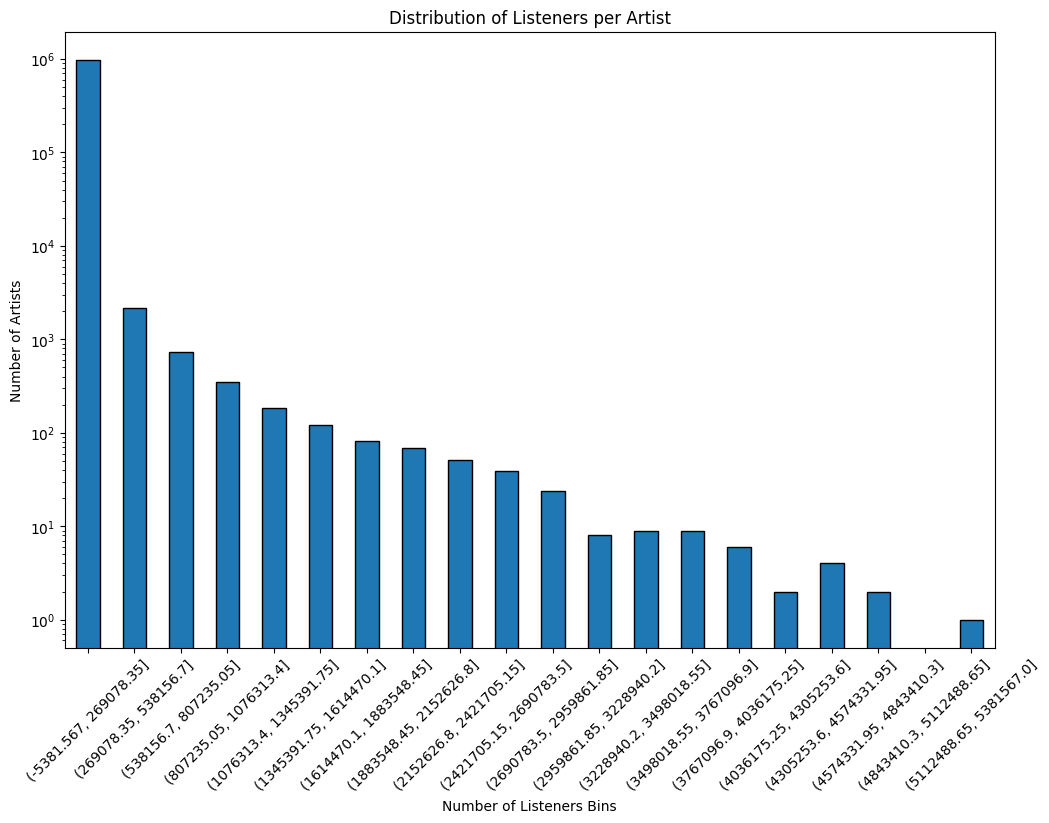

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df = pd.read_csv('/content/artists.csv.zip')  # Replace with your dataset path

# Drop rows with NaN values in 'listeners_lastfm'
df_clean = df.dropna(subset=['listeners_lastfm'])

# Define bins for listener counts
bins = pd.cut(df_clean['listeners_lastfm'], bins=20)  # Adjust number of bins as needed

# Count the number of entries in each bin
bin_counts = bins.value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(12, 8))
bin_counts.plot(kind='bar', edgecolor='k')
plt.title('Distribution of Listeners per Artist')
plt.xlabel('Number of Listeners Bins')
plt.ylabel('Number of Artists')
plt.xticks(rotation=45)
plt.yscale('log')  # Optional: Use logarithmic scale if needed
plt.show()


<ipython-input-47-6541ef76642c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['scrobbles_lastfm'] = pd.to_numeric(df_clean['scrobbles_lastfm'], errors='coerce')


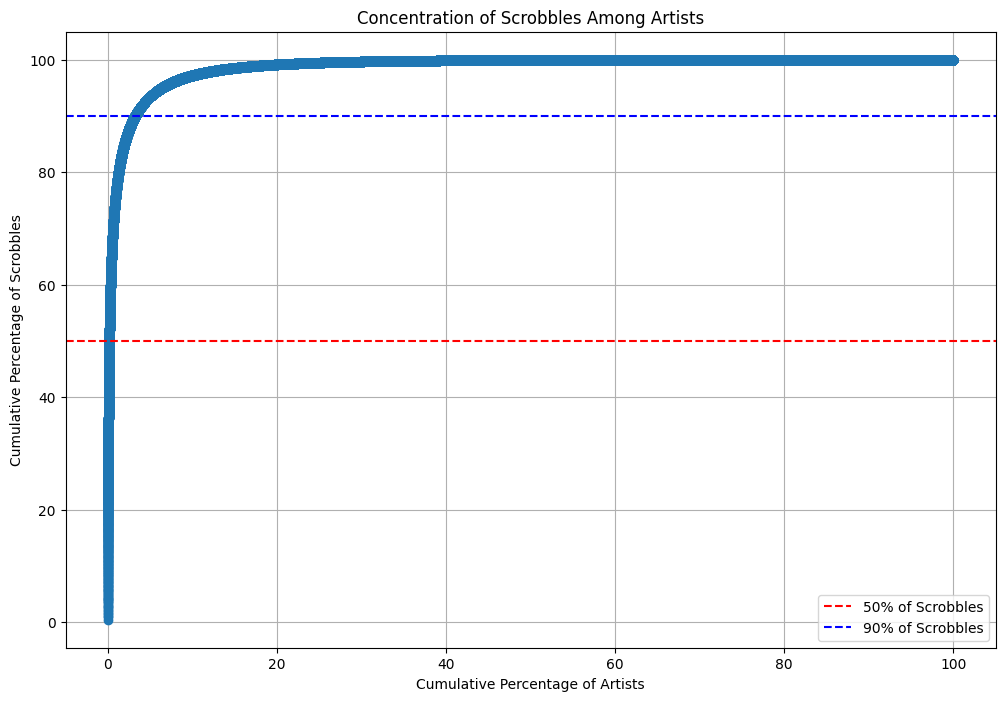

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df = pd.read_csv('/content/artists.csv.zip', low_memory=False)  # Adjust path as needed

# Drop rows with NaN values in 'scrobbles_lastfm'
df_clean = df.dropna(subset=['scrobbles_lastfm'])

# Convert 'scrobbles_lastfm' to numeric if it's not already
df_clean['scrobbles_lastfm'] = pd.to_numeric(df_clean['scrobbles_lastfm'], errors='coerce')

# Sort artists by the number of scrobbles in descending order
sorted_df = df_clean.sort_values(by='scrobbles_lastfm', ascending=False)

# Calculate cumulative sum of scrobbles
sorted_df['cumulative_scrobbles'] = sorted_df['scrobbles_lastfm'].cumsum()
total_scrobbles = sorted_df['scrobbles_lastfm'].sum()
sorted_df['cumulative_percentage'] = (sorted_df['cumulative_scrobbles'] / total_scrobbles) * 100

# Calculate cumulative percentage of artists
sorted_df['cumulative_artists'] = (range(1, len(sorted_df) + 1))  # Use range as it is
sorted_df['cumulative_artists'] = (sorted_df['cumulative_artists'] / len(sorted_df)) * 100

# Plot cumulative distribution
plt.figure(figsize=(12, 8))
plt.plot(sorted_df['cumulative_artists'], sorted_df['cumulative_percentage'], marker='o')
plt.axhline(y=50, color='r', linestyle='--', label='50% of Scrobbles')
plt.axhline(y=90, color='b', linestyle='--', label='90% of Scrobbles')
plt.title('Concentration of Scrobbles Among Artists')
plt.xlabel('Cumulative Percentage of Artists')
plt.ylabel('Cumulative Percentage of Scrobbles')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-49-09c80960144b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['scrobbles_lastfm'] = pd.to_numeric(df_clean['scrobbles_lastfm'], errors='coerce')
<ipython-input-49-09c80960144b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tags_lastfm'] = df_clean['tags_lastfm'].str.split(',')


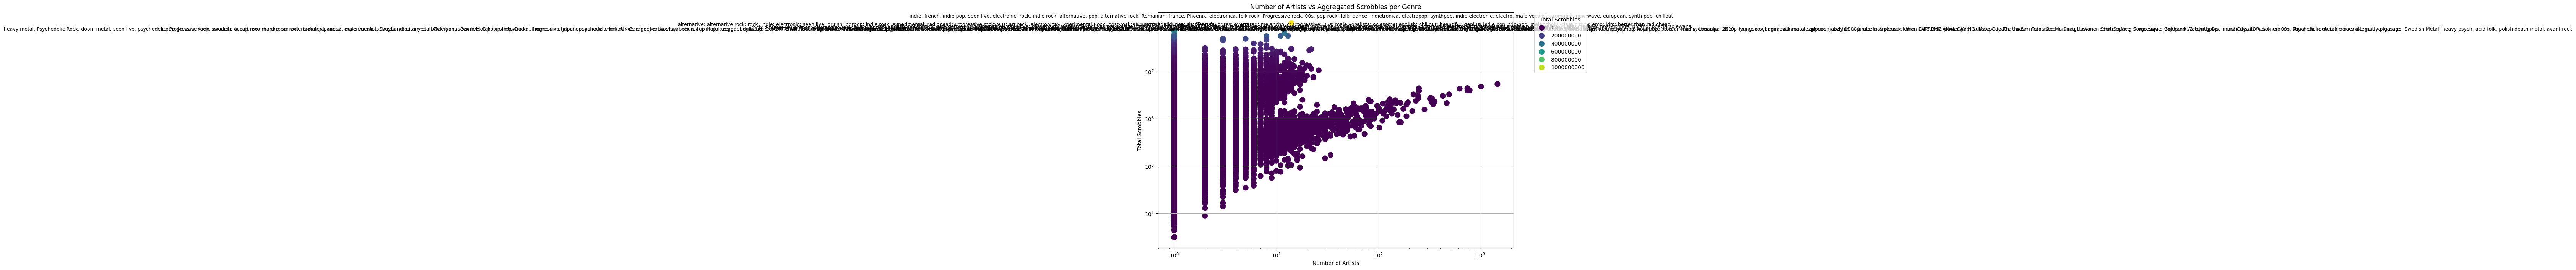

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
df = pd.read_csv('/content/artists.csv.zip', low_memory=False)  # Adjust path as needed

# Drop rows with NaN values in 'tags_lastfm' and 'scrobbles_lastfm'
df_clean = df.dropna(subset=['tags_lastfm', 'scrobbles_lastfm'])

# Convert 'scrobbles_lastfm' to numeric if it's not already
df_clean['scrobbles_lastfm'] = pd.to_numeric(df_clean['scrobbles_lastfm'], errors='coerce')

# Split the genre tags and explode the DataFrame to have one genre per row
df_clean['tags_lastfm'] = df_clean['tags_lastfm'].str.split(',')
df_exploded = df_clean.explode('tags_lastfm')

# Aggregate scrobbles and count of artists per genre
genre_stats = df_exploded.groupby('tags_lastfm').agg(
    total_scrobbles=('scrobbles_lastfm', 'sum'),
    artist_count=('mbid', 'nunique')
).reset_index()

# Find top genres based on total scrobbles (for annotation)
top_genres = genre_stats.sort_values(by='total_scrobbles', ascending=False).head(10)

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=genre_stats, x='artist_count', y='total_scrobbles', hue='total_scrobbles', palette='viridis', edgecolor=None, s=100)

# Annotate top genres
for _, row in top_genres.iterrows():
    plt.annotate(row['tags_lastfm'], (row['artist_count'], row['total_scrobbles']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.title('Number of Artists vs Aggregated Scrobbles per Genre')
plt.xlabel('Number of Artists')
plt.ylabel('Total Scrobbles')
plt.legend(title='Total Scrobbles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('log')  # Optional: Use logarithmic scale if needed
plt.yscale('log')  # Optional: Use logarithmic scale if needed
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

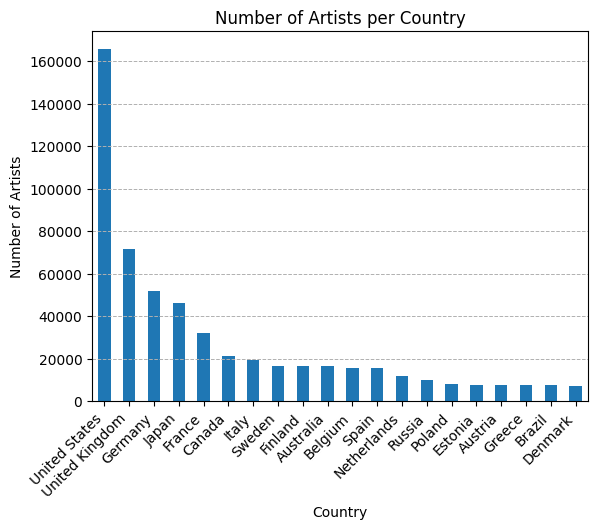

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df = pd.read_csv('/content/artists.csv.zip', low_memory=False)  # Adjust path as needed

# Drop rows with NaN values in 'country_mb'
df_clean = df.dropna(subset=['country_mb'])

# Count the number of unique artists per country
country_artist_count = df_clean.groupby('country_mb')['mbid'].nunique().reset_index()
country_artist_count.columns = ['Country', 'Number of Artists']

# Plot bar chart
plt.figure(figsize=(12, 8))
country_artist_count.sort_values(by='Number of Artists', ascending=False).head(20).plot(kind='bar', x='Country', y='Number of Artists', legend=False)
plt.title('Number of Artists per Country')
plt.xlabel('Country')
plt.ylabel('Number of Artists')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


In [60]:
import pandas as pd
import geopandas as gpd

# Load the dataset
df = pd.read_csv('/content/artists.csv.zip', low_memory=False)  # Adjust path as needed

# Drop rows with NaN values in 'country_mb', 'scrobbles_lastfm'
df_clean = df.dropna(subset=['country_mb', 'scrobbles_lastfm'])

# Convert 'scrobbles_lastfm' to numeric if it's not already
df_clean['scrobbles_lastfm'] = pd.to_numeric(df_clean['scrobbles_lastfm'], errors='coerce')

# Aggregate total scrobbles and get top artists per country
country_scrobbles = df_clean.groupby('country_mb').agg(
    total_scrobbles=('scrobbles_lastfm', 'sum'),
    top_artists=('mbid', lambda x: ', '.join(df_clean.loc[df_clean['country_mb'] == x.name, 'artist_lastfm'].dropna().unique()))
).reset_index()

# Load geographical data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge geographical data with scrobbles data
world = world.rename(columns={'name': 'country_mb'})
merged = world.set_index('country_mb').join(country_scrobbles.set_index('country_mb'))

# Handle missing data (if any country is missing in the scrobbles data)
merged = merged.reset_index()


<ipython-input-60-4816fd7521e0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['scrobbles_lastfm'] = pd.to_numeric(df_clean['scrobbles_lastfm'], errors='coerce')
<ipython-input-60-4816fd7521e0>:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [64]:
import folium
from branca.colormap import linear

# Initialize the map
m = folium.Map(location=[0, 0], zoom_start=2, control_scale=True)

# Define color scale for scrobbles with sorted thresholds
min_scrobbles = merged['total_scrobbles'].min()
max_scrobbles = merged['total_scrobbles'].max()

# Define color thresholds and colormap
thresholds = [min_scrobbles, min_scrobbles + 0.25 * (max_scrobbles - min_scrobbles),
               min_scrobbles + 0.5 * (max_scrobbles - min_scrobbles),
               min_scrobbles + 0.75 * (max_scrobbles - min_scrobbles),
               max_scrobbles]
colormap = linear.PuBu_09.scale(min_scrobbles, max_scrobbles).to_step(len(thresholds))

# Add countries to the map with color scale
for _, row in merged.iterrows():
    if pd.notna(row['geometry']):
        folium.GeoJson(
            row['geometry'],
            style_function=lambda feature, scrobbles=row['total_scrobbles']: {
                'fillColor': colormap(scrobbles),
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.6
            }
        ).add_to(m)

# Add color scale legend
colormap.caption = 'Total Scrobbles'
m.add_child(colormap)

# Save map to an HTML file
m.save('music_production_map_without_markers.html')


In [65]:
m

In [68]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/artists.csv.zip', low_memory=False)  # Adjust path as needed

# Drop rows with NaN values in 'country_mb', 'tags_mb'
df_clean = df.dropna(subset=['country_mb', 'tags_mb'])

# Convert 'scrobbles_lastfm' to numeric if it's not already
df_clean['scrobbles_lastfm'] = pd.to_numeric(df_clean['scrobbles_lastfm'], errors='coerce')

# Aggregate total scrobbles by country and genre
df_clean['tags_mb'] = df_clean['tags_mb'].apply(lambda x: x.split(','))  # Split tags into list if they are comma-separated
df_exploded = df_clean.explode('tags_mb')  # Expand list into separate rows

# Aggregate total scrobbles for each country and genre
country_genre_scrobbles = df_exploded.groupby(['country_mb', 'tags_mb']).agg(
    total_scrobbles=('scrobbles_lastfm', 'sum')
).reset_index()

# Determine top 10 genres based on total scrobbles
top_genres = country_genre_scrobbles.groupby('tags_mb')['total_scrobbles'].sum().nlargest(10).index
top_genre_data = country_genre_scrobbles[country_genre_scrobbles['tags_mb'].isin(top_genres)]


<ipython-input-68-4a7a997426ab>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['scrobbles_lastfm'] = pd.to_numeric(df_clean['scrobbles_lastfm'], errors='coerce')
<ipython-input-68-4a7a997426ab>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tags_mb'] = df_clean['tags_mb'].apply(lambda x: x.split(','))  # Split tags into list if they are comma-separated


<ipython-input-69-e3e38bb86bb3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_scrobbles', y='country_mb', data=genre_data, ax=ax, palette='viridis')
<ipython-input-69-e3e38bb86bb3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_scrobbles', y='country_mb', data=genre_data, ax=ax, palette='viridis')
<ipython-input-69-e3e38bb86bb3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_scrobbles', y='country_mb', data=genre_data, ax=ax, palette='viridis')
<ipython-input-69-e3e38bb86bb3>:16: FutureWarning: 

Passing 

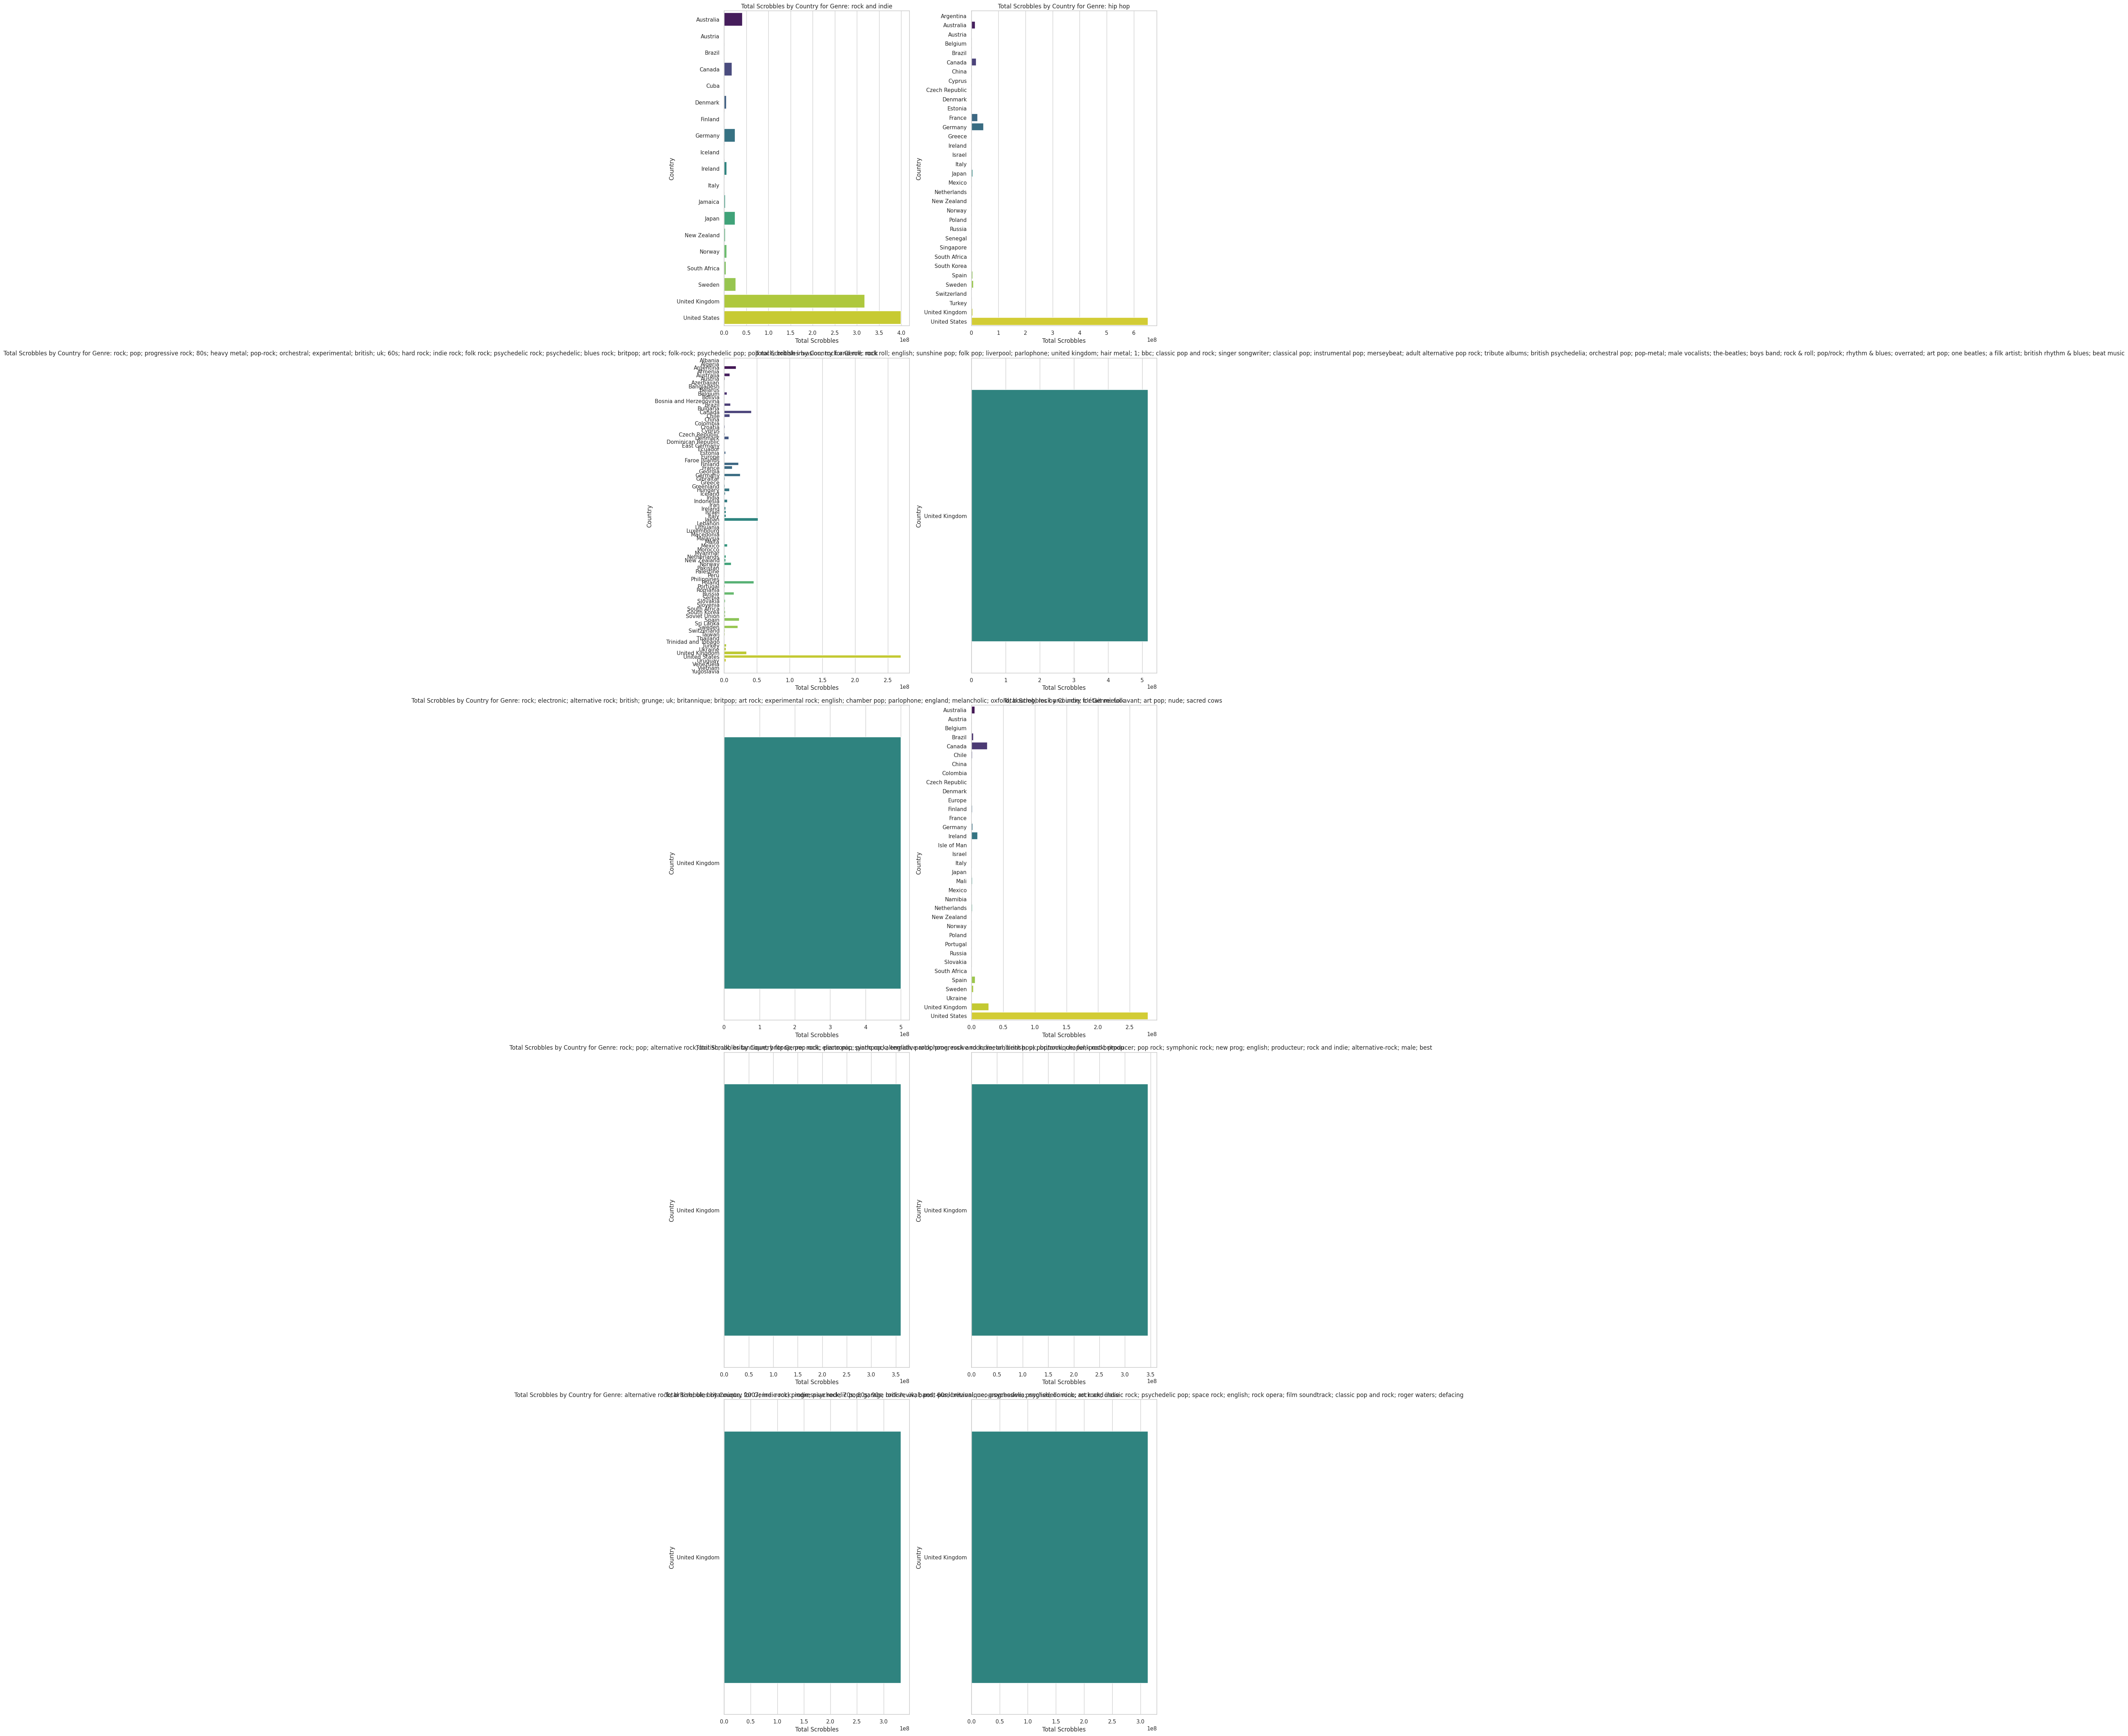

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Create subplots
num_genres = len(top_genres)
fig, axes = plt.subplots(nrows=(num_genres + 1) // 2, ncols=2, figsize=(15, num_genres * 5))
axes = axes.flatten()

# Generate bar plots for each genre
for i, genre in enumerate(top_genres):
    ax = axes[i]
    genre_data = top_genre_data[top_genre_data['tags_mb'] == genre]
    sns.barplot(x='total_scrobbles', y='country_mb', data=genre_data, ax=ax, palette='viridis')
    ax.set_title(f'Total Scrobbles by Country for Genre: {genre}')
    ax.set_xlabel('Total Scrobbles')
    ax.set_ylabel('Country')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('country_genre_scrobbles_barplots.png')
plt.show()
